In [2]:
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem
from rdkit.Chem import rdMolDescriptors as rdmd
import pandas as pd
from tqdm import tqdm
import time
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt

In [34]:
mito = pd.read_csv("Train_and_Test_data.csv") 
mito  = mito[["Activity", "smiles_r", "data"]]
mito

,Activity,smiles_r,data
0,0.0,CN(C)C(=O)Oc1cc(OC(=O)N(C)C)cc(C(O)CNC(C)(C)C)c1,Test Set
1,0.0,CC(C)NCC(O)COc1cccc2ccccc12,Test Set
2,0.0,N=c1nc(-c2cc(Cl)ccc2Cl)[nH]c(=N)[nH]1,Test Set
3,1.0,CC[C@@H](C(=O)[C@@H](C)[C@@H](O)[C@H](C)CCc1cc...,Test Set
4,0.0,O=C(COc1ccc(Cl)cc1)N1CCN(Cc2ccc3c(c2)OCO3)CC1,Test Set
...,...,...,...
613,0.0,C[C@H](CS)C(=O)N1CCC[C@H]1C(=O)O,Training Set
614,0.0,CN(C)c1nc(N(C)C)nc(N(C)C)n1,Training Set
615,0.0,O=c1ccc2ccccc2o1,Training Set
616,0.0,Nc1ccc(S(=O)(=O)Nc2nccs2)cc1,Training Set


In [35]:
def MorganFingerprint(s):
    x = Chem.MolFromSmiles(s)
    return (AllChem.GetMorganFingerprintAsBitVect(x,2,2048))

def GetMACCSkeys(s):
    x = Chem.MolFromSmiles(s)
    return (MACCSkeys.GenMACCSKeys(x))

from rdkit.Chem import MACCSkeys
from rdkit import DataStructs
from rdkit.Chem.Fingerprints import FingerprintMols

In [36]:
from pandarallel import pandarallel

In [37]:
def addfps(data, fn, nm):
    pandarallel.initialize()
    array=[]
    array = np.stack(data['smiles_r'].parallel_apply(fn))
    collection = []
    for x in np.arange(array.shape[1]):
        x = nm+str(x)
        collection.append(x)
    table = pd.DataFrame(array, columns=collection)
    df= pd.concat([data, table], axis=1)
    return df

In [38]:
data=mito
data=addfps(data, MorganFingerprint, 'M')

INFO: Pandarallel will run on 40 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [41]:
df=data
df

,Activity,smiles_r,data,M0,M1,M2,M3,M4,M5,M6,...,M2038,M2039,M2040,M2041,M2042,M2043,M2044,M2045,M2046,M2047
0,0.0,CN(C)C(=O)Oc1cc(OC(=O)N(C)C)cc(C(O)CNC(C)(C)C)c1,Test Set,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,CC(C)NCC(O)COc1cccc2ccccc12,Test Set,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0.0,N=c1nc(-c2cc(Cl)ccc2Cl)[nH]c(=N)[nH]1,Test Set,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,CC[C@@H](C(=O)[C@@H](C)[C@@H](O)[C@H](C)CCc1cc...,Test Set,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0.0,O=C(COc1ccc(Cl)cc1)N1CCN(Cc2ccc3c(c2)OCO3)CC1,Test Set,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,0.0,C[C@H](CS)C(=O)N1CCC[C@H]1C(=O)O,Training Set,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
614,0.0,CN(C)c1nc(N(C)C)nc(N(C)C)n1,Training Set,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
615,0.0,O=c1ccc2ccccc2o1,Training Set,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
616,0.0,Nc1ccc(S(=O)(=O)Nc2nccs2)cc1,Training Set,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [121]:
from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem.Fingerprints import FingerprintMols
import pandas as pd

#Morgan Fingerprint Correlations
#Active vs Inactive

from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem.Fingerprints import FingerprintMols
import pandas as pd

# proof and make a list of SMILES

df_smiles_a = df[df.data=="Test Set"]['smiles_r']
df_smiles_i = df[df.data=="Training Set"]['smiles_r']


c_smiles_a = []
for ds in df_smiles_a:
    try:
        cs = Chem.CanonSmiles(ds)
        c_smiles_a.append(cs)
    except:
        print('Invalid SMILES:', ds)
print()


c_smiles_i = []
for ds in df_smiles_i:
    try:
        cs = Chem.CanonSmiles(ds)
        c_smiles_i.append(cs)
    except:
        print('Invalid SMILES:', ds)
print()



# make a list of mols
ms_a = [Chem.MolFromSmiles(x) for x in c_smiles_a]

# make a list of fingerprints (fp)
fps_a = [AllChem.GetMorganFingerprintAsBitVect(x, radius=2, nBits=2048) for x in ms_a]

# make a list of mols
ms_i = [Chem.MolFromSmiles(x) for x in c_smiles_i]

# make a list of fingerprints (fp)
fps_i = [AllChem.GetMorganFingerprintAsBitVect(x, radius=2, nBits=2048) for x in ms_i]



# the list for the dataframe
qu, ta, sim = [], [], []

# compare all fp pairwise without duplicates

for a in range(len(fps_a)):
    
    s = DataStructs.BulkTanimotoSimilarity(fps_a[a], fps_i)    
    for m in range(len(s)):
        qu.append(c_smiles_a[a])
        ta.append(c_smiles_i[m])
        sim.append(s[m])

# build the dataframe and sort it
d = {'query':qu, 'target':ta, 'MFP_Tc':sim}
df_final_ai= pd.DataFrame(data=d)
#df_final_ai = df_final_ai.sort_values('MFP_Tc', ascending=False)
#df_final_ai=df_final_ai.reset_index()
df_final_ai

# save as csv
#df_final.to_csv('third.csv', index=False, sep=',')

,query,target,MFP_Tc
0,CN(C)C(=O)Oc1cc(OC(=O)N(C)C)cc(C(O)CNC(C)(C)C)c1,CC1=NN(c2ccccc2)C(=O)C1,0.068966
1,CN(C)C(=O)Oc1cc(OC(=O)N(C)C)cc(C(O)CNC(C)(C)C)c1,Nc1ccc(S(=O)(=O)Nc2ncccn2)cc1,0.086207
2,CN(C)C(=O)Oc1cc(OC(=O)N(C)C)cc(C(O)CNC(C)(C)C)c1,CC(C)(Oc1ccc(Cl)cc1)C(=O)O,0.196078
3,CN(C)C(=O)Oc1cc(OC(=O)N(C)C)cc(C(O)CNC(C)(C)C)c1,Cc1cc(NS(=O)(=O)c2ccc(N)cc2)no1,0.096774
4,CN(C)C(=O)Oc1cc(OC(=O)N(C)C)cc(C(O)CNC(C)(C)C)c1,NCC(CC(=O)O)c1ccc(Cl)cc1,0.145455
...,...,...,...
90147,Oc1ccc2c3c1OC1c4oc5ccccc5c4CC4(O)C(C2)N(CC2CC2...,C[C@H](CS)C(=O)N1CCC[C@H]1C(=O)O,0.108434
90148,Oc1ccc2c3c1OC1c4oc5ccccc5c4CC4(O)C(C2)N(CC2CC2...,CN(C)c1nc(N(C)C)nc(N(C)C)n1,0.014085
90149,Oc1ccc2c3c1OC1c4oc5ccccc5c4CC4(O)C(C2)N(CC2CC2...,O=c1ccc2ccccc2o1,0.125000
90150,Oc1ccc2c3c1OC1c4oc5ccccc5c4CC4(O)C(C2)N(CC2CC2...,Nc1ccc(S(=O)(=O)Nc2nccs2)cc1,0.033708


In [122]:
PW= df_final_ai.MFP_Tc.values.reshape(236, 382)
PW

array([[0.06896552, 0.0862069 , 0.19607843, ..., 0.05660377, 0.06349206,
        0.07407407],
       [0.10909091, 0.12727273, 0.11111111, ..., 0.14583333, 0.08196721,
        0.1875    ],
       [0.07692308, 0.0754717 , 0.14583333, ..., 0.08695652, 0.07017544,
        0.08333333],
       ...,
       [0.09090909, 0.07017544, 0.09259259, ..., 0.08      , 0.06557377,
        0.09803922],
       [0.14516129, 0.125     , 0.14754098, ..., 0.10169492, 0.10144928,
        0.11666667],
       [0.10126582, 0.06024096, 0.0617284 , ..., 0.125     , 0.03370787,
        0.1369863 ]])

/scratch/ss2686/envs/my-rdkit-env/lib/python3.6/site-packages/seaborn/matrix.py:659: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 3000x500 with 0 Axes>

<Figure size 1080x864 with 0 Axes>

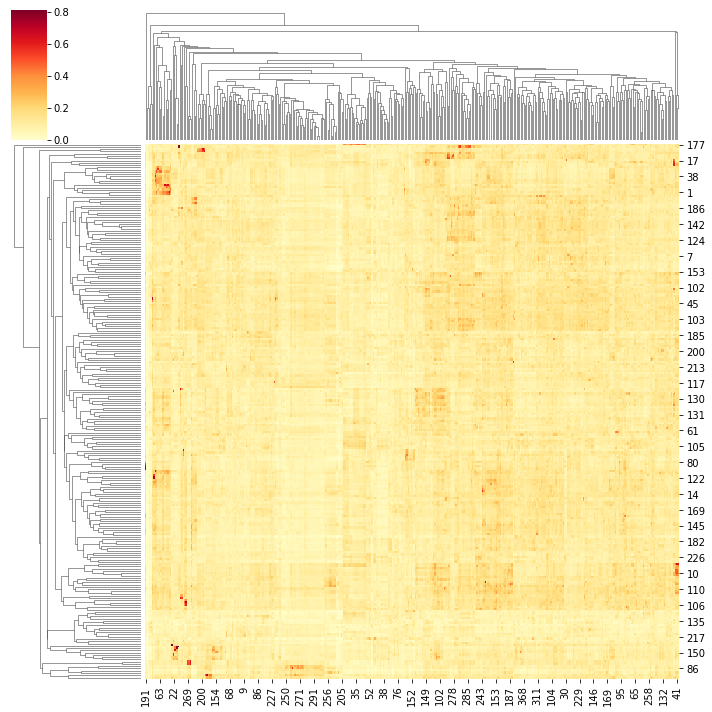

In [123]:
plt.figure(figsize=(30,5), dpi= 100)
plt.figure(figsize=(15,12))
fg  = sns.clustermap(PW, cmap='YlOrRd')

In [124]:
df_final_ai = df_final_ai.sort_values('MFP_Tc', ascending=False)
df_final_ai=df_final_ai.reset_index()
df_final_ai = df_final_ai.drop_duplicates(subset="query", keep="first")
df_final_ai

,index,query,target,MFP_Tc
0,63570,Oc1cc2c(c(Cl)c1O)CCNCC2c1ccccc1,Oc1ccc(C2CNCCc3c2cc(O)c(O)c3Cl)cc1,0.809524
1,23182,O=C(CCCN1CCC(O)(c2ccc(Cl)cc2)CC1)c1ccc(F)cc1,O=C(CCCN1CCC(O)(c2ccc(Br)cc2)CC1)c1ccc(F)cc1,0.791667
2,66216,O=c1c(O)c(-c2cc(O)c(O)c(O)c2)oc2cc(O)cc(O)c12,O=c1c(O)c(-c2ccc(O)c(O)c2)oc2cc(O)cc(O)c12,0.756757
4,45267,CN(C)CCN(Cc1ccccc1)c1ccccn1,COc1ccc(CN(CCN(C)C)c2ccccn2)cc1,0.743590
5,46792,CNCC[C@@H](Oc1ccccc1C)c1ccccc1,CNCCC(Oc1ccccc1OC)c1ccccc1,0.729730
...,...,...,...,...
4262,1398,CC[C@@H](C(=O)[C@@H](C)[C@@H](O)[C@H](C)CCc1cc...,CCOC(=O)[C@H](CCc1ccccc1)N[C@@H](C)C(=O)N1CCC[...,0.180952
4573,72427,CN(C)S(=O)(=O)c1ccc2c(c1)/C(=C/c1cc3c([nH]1)CC...,CN1CCN(CC(=O)N2c3ccccc3C(O)=Nc3cccnc32)CC1,0.178571
5315,81093,N=C(N)N=C(O)c1nc(Cl)c(N2CCCCCC2)nc1N,CCn1cc(C(=O)O)c(=O)c2cnc(N3CCCC3)nc21,0.173913
5949,58187,CC1CCNC(=N)S1,CCCN1CCC[C@@H]2Cc3nc(=N)[nH]cc3C[C@H]21,0.169811


Text(10.049999999999997, 0.5, 'Frequency')

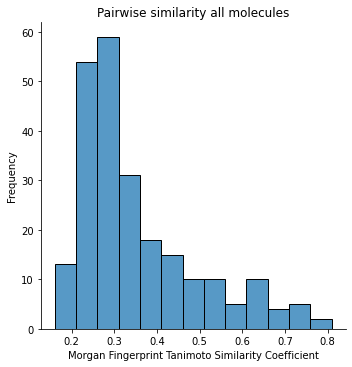

In [125]:
import seaborn as sns
sns.displot(df_final_ai["MFP_Tc"])
plt.title('Pairwise similarity all molecules')
# Add title and axis names

plt.xlabel('Morgan Fingerprint Tanimoto Similarity Coefficient')
plt.ylabel('Frequency')
 

In [84]:
from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem.Fingerprints import FingerprintMols
import pandas as pd

#Morgan Fingerprint Correlations
#Active vs Inactive

from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem.Fingerprints import FingerprintMols
import pandas as pd

# proof and make a list of SMILES

df_smiles_a = df[df.data=="Test Set"]['smiles_r']
df_smiles_i = df[df.data=="Training Set"]['smiles_r']


c_smiles_a = []
for ds in df_smiles_a:
    try:
        cs = Chem.CanonSmiles(ds)
        c_smiles_a.append(cs)
    except:
        print('Invalid SMILES:', ds)
print()


c_smiles_i = []
for ds in df_smiles_i:
    try:
        cs = Chem.CanonSmiles(ds)
        c_smiles_i.append(cs)
    except:
        print('Invalid SMILES:', ds)
print()



# make a list of mols
ms_a = [Chem.MolFromSmiles(x) for x in c_smiles_a]

# make a list of fingerprints (fp)
fps_a = [MACCSkeys.GenMACCSKeys(x) for x in ms_a]

# make a list of mols
ms_i = [Chem.MolFromSmiles(x) for x in c_smiles_i]

# make a list of fingerprints (fp)
fps_i = [MACCSkeys.GenMACCSKeys(x) for x in ms_i]



# the list for the dataframe
qu, ta, sim = [], [], []

# compare all fp pairwise without duplicates

for a in range(len(fps_a)):
    
    s = DataStructs.BulkTanimotoSimilarity(fps_a[a], fps_i)    
    for m in range(len(s)):
        qu.append(c_smiles_a[a])
        ta.append(c_smiles_i[m])
        sim.append(s[m])

# build the dataframe and sort it
d = {'query':qu, 'target':ta, 'MACCS_Tc':sim}
df_final_ai= pd.DataFrame(data=d)
#df_final_ai = df_final_ai.sort_values('MACCS_Tc', ascending=False)
#df_final_ai=df_final_ai.reset_index()
df_final_ai

# save as csv
#df_final.to_csv('third.csv', index=False, sep=',')

,query,target,MACCS_Tc
0,CN(C)C(=O)Oc1cc(OC(=O)N(C)C)cc(C(O)CNC(C)(C)C)c1,CC1=NN(c2ccccc2)C(=O)C1,0.264706
1,CN(C)C(=O)Oc1cc(OC(=O)N(C)C)cc(C(O)CNC(C)(C)C)c1,Nc1ccc(S(=O)(=O)Nc2ncccn2)cc1,0.200000
2,CN(C)C(=O)Oc1cc(OC(=O)N(C)C)cc(C(O)CNC(C)(C)C)c1,CC(C)(Oc1ccc(Cl)cc1)C(=O)O,0.377358
3,CN(C)C(=O)Oc1cc(OC(=O)N(C)C)cc(C(O)CNC(C)(C)C)c1,Cc1cc(NS(=O)(=O)c2ccc(N)cc2)no1,0.246914
4,CN(C)C(=O)Oc1cc(OC(=O)N(C)C)cc(C(O)CNC(C)(C)C)c1,NCC(CC(=O)O)c1ccc(Cl)cc1,0.345455
...,...,...,...
90147,Oc1ccc2c3c1OC1c4oc5ccccc5c4CC4(O)C(C2)N(CC2CC2...,C[C@H](CS)C(=O)N1CCC[C@H]1C(=O)O,0.461538
90148,Oc1ccc2c3c1OC1c4oc5ccccc5c4CC4(O)C(C2)N(CC2CC2...,CN(C)c1nc(N(C)C)nc(N(C)C)n1,0.212121
90149,Oc1ccc2c3c1OC1c4oc5ccccc5c4CC4(O)C(C2)N(CC2CC2...,O=c1ccc2ccccc2o1,0.290909
90150,Oc1ccc2c3c1OC1c4oc5ccccc5c4CC4(O)C(C2)N(CC2CC2...,Nc1ccc(S(=O)(=O)Nc2nccs2)cc1,0.202381


In [88]:
PW= df_final_ai.MACCS_Tc.values.reshape(236, 382)
PW

array([[0.26470588, 0.2       , 0.37735849, ..., 0.2       , 0.2       ,
        0.21311475],
       [0.20634921, 0.17808219, 0.34042553, ..., 0.30232558, 0.16216216,
        0.42222222],
       [0.29090909, 0.35      , 0.1372549 , ..., 0.15909091, 0.265625  ,
        0.25531915],
       ...,
       [0.42372881, 0.32394366, 0.24561404, ..., 0.28      , 0.34285714,
        0.30909091],
       [0.3       , 0.31168831, 0.23809524, ..., 0.16393443, 0.27848101,
        0.16176471],
       [0.28169014, 0.20238095, 0.23809524, ..., 0.29090909, 0.20238095,
        0.33898305]])

/scratch/ss2686/envs/my-rdkit-env/lib/python3.6/site-packages/seaborn/matrix.py:659: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 3000x500 with 0 Axes>

<Figure size 1080x864 with 0 Axes>

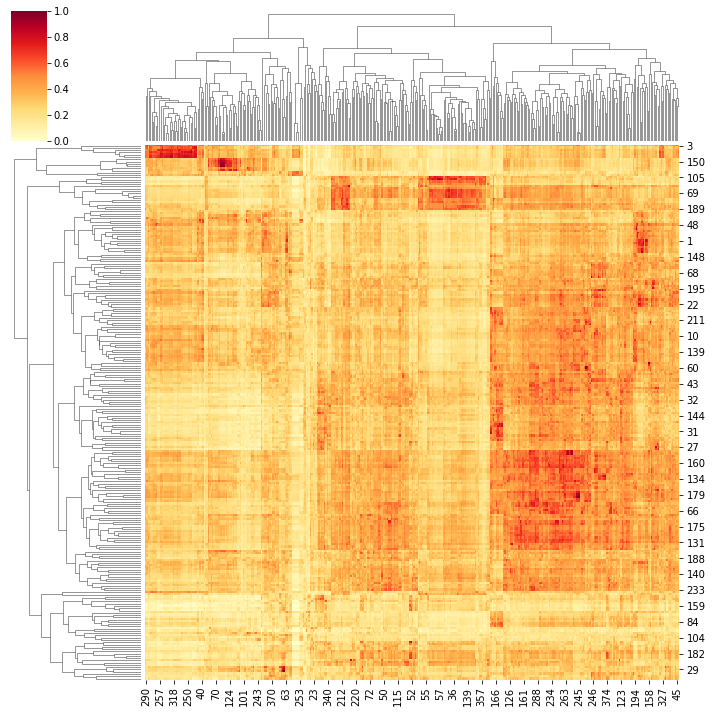

In [112]:
plt.figure(figsize=(30,5), dpi= 100)
plt.figure(figsize=(15,12))
fg  = sns.clustermap(PW, cmap='YlOrRd')

In [113]:
df_final_ai = df_final_ai.sort_values('MACCS_Tc', ascending=False)
df_final_ai=df_final_ai.reset_index()
df_final_ai = df_final_ai.drop_duplicates(subset="query", keep="first")
df_final_ai

,index,query,target,MACCS_Tc
0,40589,Cc1ccc(Cl)c(Nc2ccccc2C(=O)O)c1Cl,Cc1c(Cl)cccc1Nc1ccccc1C(=O)O,1.000000
1,66216,O=c1c(O)c(-c2cc(O)c(O)c(O)c2)oc2cc(O)cc(O)c12,O=c1c(O)c(-c2ccc(O)c(O)c2)oc2cc(O)cc(O)c12,1.000000
2,63570,Oc1cc2c(c(Cl)c1O)CCNCC2c1ccccc1,Oc1ccc(C2CNCCc3c2cc(O)c(O)c3Cl)cc1,0.977273
4,55900,O=c1c(-c2ccc(O)cc2)coc2cc(O)ccc12,O=c1c(-c2ccc(O)cc2)coc2cc(O)cc(O)c12,0.962963
5,90015,Oc1ccc2c3c1OC1c4oc5ccccc5c4CC4(O)C(C2)N(CC2CC2...,O=C1CC[C@@]2(O)[C@H]3Cc4ccc(O)c5c4[C@@]2(CCN3C...,0.962963
...,...,...,...,...
10888,33620,N=C(N)NCc1cccc(I)c1,NCC(CC(=O)O)c1ccc(Cl)cc1,0.457143
11933,80097,c1ccc2c(c1)[I+]c1ccccc1-2,Cc1ccc2cc3c(ccc4ccccc43)c3c2c1CC3,0.450000
12353,25760,C#CCN(C)[C@H](C)Cc1ccccc1,CC1CCN(CCCC(=O)c2ccc(F)cc2)CC1,0.447368
17365,5896,C#CCN(C)Cc1ccccc1,CC1CCN(CCCC(=O)c2ccc(F)cc2)CC1,0.416667


Text(9.924999999999997, 0.5, 'Frequency')

<Figure size 3000x500 with 0 Axes>

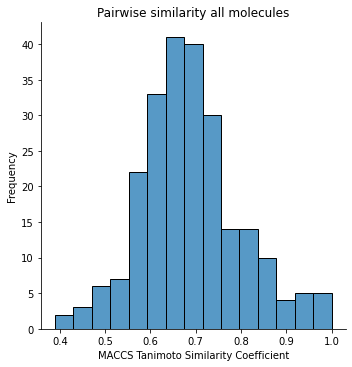

In [115]:
import seaborn as sns
plt.figure(figsize=(30,5), dpi= 100)
sns.displot(df_final_ai["MACCS_Tc"])
plt.title('Pairwise similarity all molecules')
# Add title and axis names

plt.xlabel('MACCS Tanimoto Similarity Coefficient')
plt.ylabel('Frequency')
 